# Task - 3 Create the Decision Tree classifier and visualize it graphically.

# Graduate Rotational Internship Program

# Author - Uttam Grade

# Spark Foundataion Task 3

In [1]:
# Import require Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/iris.csv') 
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.shape # Check Shape of the Data

(150, 6)

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info() # Information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
df.isnull().sum() # Check Is there any Null Values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Declare feature vector and target variable 

In [26]:
# Declare Feature Vector and Target variables
X = df.drop(['Species', 'Id'], axis = 1) # Drop Two, Columnw which is not required for Feature Vectors
Y = df['Species']

In [28]:
# Split the Data
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size = .30, random_state = 42)

In [29]:
# Check the unique Values
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Feature Engineering

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power.

In [30]:
X_train.dtypes # Datatypes of the columns

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

#  Decision Tree Classifier with Gini Index

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Initialize the Decision Tree model
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0) 


# fit the model
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [40]:
# Predict the values with Gini Index
Y_pred_gini = clf_gini.predict(X_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_gini)))

Model accuracy score with criterion gini index: 1.0000


In [44]:
y_pred_train_gini = clf_gini.predict(X_train)
# Check the Accuracy
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9524


In [45]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, Y_train)))
# CHeck the train and test Accuracy
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, Y_test)))

Training set score: 0.9524
Test set score: 1.0000


[Text(209.25, 475.65000000000003, 'X[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(139.5, 339.75, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(279.0, 339.75, 'X[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(139.5, 203.85000000000002, 'X[3] <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(69.75, 67.94999999999999, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(209.25, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(418.5, 203.85000000000002, 'X[3] <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(348.75, 67.94999999999999, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(488.25, 67.94999999999999, 'gini = 0.059\nsamples = 33\nvalue = [0, 1, 32]')]

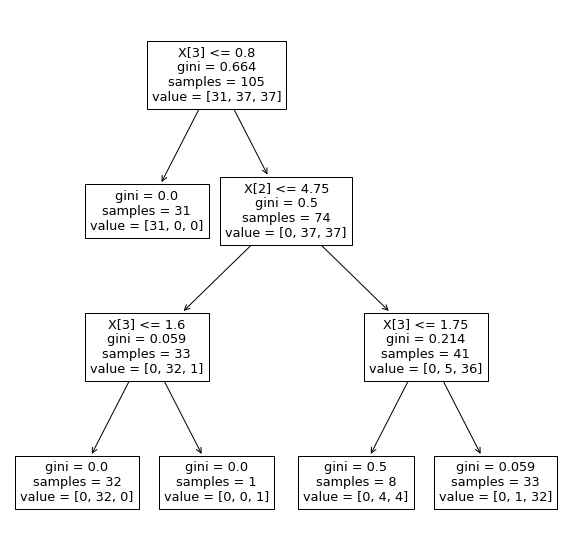

In [46]:
# VIsualize the tree, Graphically
from sklearn import tree
plt.figure(figsize = (10,10))
tree.plot_tree(clf_gini.fit(X_train, Y_train))

#  Decision Tree Classifier with criterion entropy

In [73]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [75]:
Y_pred_en = clf_en.predict(X_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_en)))

Model accuracy score with criterion entropy: 0.9778


In [77]:
#Compare the train-set and test-set accuracy
Y_pred_train_en = clf_en.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, Y_pred_train_en)))

Training-set accuracy score: 0.9524


In [78]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, Y_test)))

Training set score: 0.9524
Test set score: 0.9778


[Text(209.25, 475.65000000000003, 'X[3] <= 0.8\nentropy = 1.58\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(139.5, 339.75, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(279.0, 339.75, 'X[2] <= 4.75\nentropy = 1.0\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(139.5, 203.85000000000002, 'X[3] <= 1.6\nentropy = 0.196\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(69.75, 67.94999999999999, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(209.25, 67.94999999999999, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(418.5, 203.85000000000002, 'X[2] <= 5.15\nentropy = 0.535\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(348.75, 67.94999999999999, 'entropy = 0.918\nsamples = 15\nvalue = [0, 5, 10]'),
 Text(488.25, 67.94999999999999, 'entropy = 0.0\nsamples = 26\nvalue = [0, 0, 26]')]

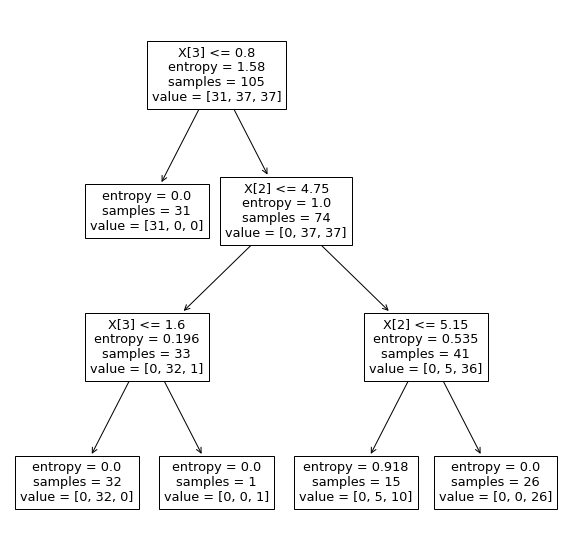

In [79]:
#Plot the Tree
plt.figure(figsize = (10,10))
tree.plot_tree(clf_en.fit(X_train, Y_train))

In [91]:
#Confusion Matrix and Classification
from sklearn.metrics import confusion_matrix, classification_report
Con_Mat = confusion_matrix(Y_test, Y_pred_en)
print('Confusion Matix:{} \n\n\n Classification Report: {}'.format(Con_Mat, classification_report(Y_test, Y_pred_en)))


Confusion Matix:[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]] 


 Classification Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



# Result and Conclusion

1- In this project, I build a Decision-Tree Classifier model to predict the Species of the Iris dataset. I build two models, one with criterion gini index and another one with criterion entropy. The model yields a very good performance as indicated by the model accuracy in both the cases.

2- In the model with criterion gini index, the training-set accuracy score is 0.9524 while the test-set accuracy to be 0.9778. These two values are quite comparable. So, there is no sign of overfitting.

In both the cases, the training-set and test-set accuracy score is the same. It may happen because of small dataset.
The confusion matrix and classification report yields very good model performance.

The Decision-Tree algorithm is one of the most frequently and widely used supervised machine learning algorithms that can be used for both classification and regression tasks. The intuition behind the Decision-Tree algorithm is very simple to understand.

The Decision Tree algorithm intuition is as follows:-

For each attribute in the dataset, the Decision-Tree algorithm forms a node. The most important attribute is placed at the root node.

For evaluating the task in hand, we start at the root node and we work our way down the tree by following the corresponding node that meets our condition or decision.

This process continues until a leaf node is reached. It contains the prediction or the outcome of the Decision Tree.